# Polyphase Timing Synchronisation

In [176]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from fir_filter import FIRFilter
from generic_modem import GenericModem
from timing_sync_polyphase import TimingSyncPolyphase
from utilities import phase_shift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
timing_sync_obj = TimingSyncPolyphase()

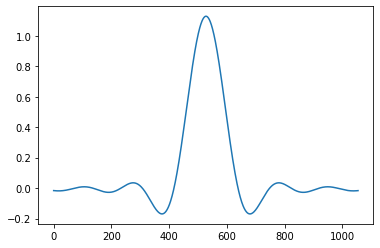

In [167]:
plt.plot(timing_sync_obj.h_int)
plt.show()

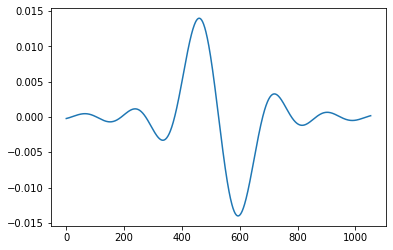

In [168]:
plt.plot(timing_sync_obj.dh_int)
plt.show()

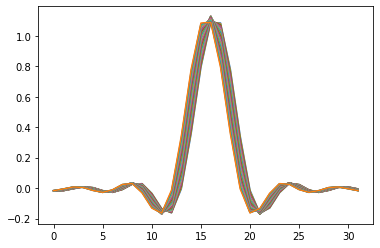

In [169]:
for i in range(32):
    plt.plot(timing_sync_obj.h[i])
plt.show()

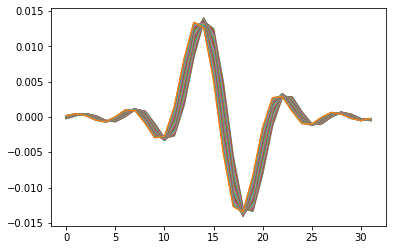

In [170]:
for i in range(32):
    plt.plot(timing_sync_obj.dh[i])
plt.show()

### Create Test Data

In [172]:
data_length = 128
data = [np.random.randint(2) for _ in range(data_length)]
modem_bpsk_obj = GenericModem(  modulation_type = ["129", "QPSK 2/9"],
                                samples_per_symbol = 4,
                                pulse_factor = 0.5,
                                pulse_length = 33,
                                filename = "../library/DVB-S2X_constellations.json")
tx = modem_bpsk_obj.modulate(data)

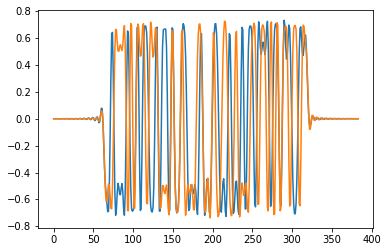

In [173]:
plt.plot(np.real(tx))
plt.plot(np.imag(tx))
plt.show()

### Calculate the response to the Maximum Likelihood timing error detector

In [233]:
EbN0 = 1000

sensitivity = []
phase = np.linspace(0,8,512)
for phase_i in phase:
    MF  = FIRFilter(timing_sync_obj.h[7], complex=True)
    dMF = FIRFilter(timing_sync_obj.h[7], complex=True)
    filtered = []
    for n, samp in enumerate(phase_shift(tx,phase_i)):
        MF_samp  = MF.update(samp)
        dMF_samp = dMF.update(samp)
        if n % 4 == 0:
            filtered.append( np.tanh(EbN0*MF_samp) * dMF_samp )
    sensitivity.append(abs(sum(filtered)))

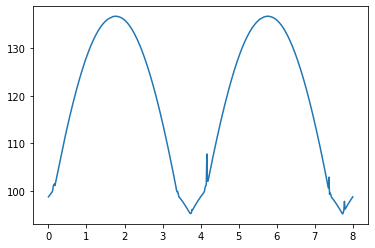

In [234]:
plt.plot(phase, sensitivity)
plt.show()

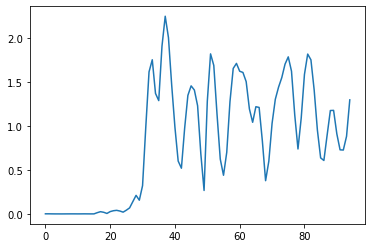

In [228]:
filtered = []
for n, samp in enumerate(phase_shift(tx,2.0)):
    if n % 4 == 0:
        filtered.append(np.sign(MF.update(samp)) * dMF.update(samp))
plt.plot([abs(_) for _ in filtered])
plt.show()